# Capstone 2 - Supermarket Customer


Analisis Kepribadian Pelanggan adalah analisis rinci tentang pelanggan ideal suatu perusahaan.
Ini membantu bisnis untuk lebih memahami pelanggannya dan memudahkan mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan kekhawatiran spesifik dari berbagai jenis pelanggan.
Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggannya dari berbagai jenis segmen pelanggan. Misalnya, daripada mengeluarkan uang untuk memasarkan produk baru ke setiap pelanggan di database perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk tersebut dan kemudian memasarkan produk hanya pada segmen tersebut.

People
● ID: Customer's unique identifier
● Year_Birth: Customer's birth year
● Education: Customer's education level
● Marital_Status: Customer's marital status
● Income: Customer's yearly household income
● Kidhome: Number of children in customer's household
● Teenhome: Number of teenagers in customer's household
● Dt_Customer: Date of customer's enrollment with the company
● Recency: Number of days since customer's last purchase
● Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products
● MntWines: Amount spent on wine in last 2 years
● MntFruits: Amount spent on fruits in last 2 years
● MntMeatProducts: Amount spent on meat in last 2 years
● MntFishProducts: Amount spent on fish in last 2 years
● MntSweetProducts: Amount spent on sweets in last 2 years
● MntGoldProds: Amount spent on gold in last 2 years
Promotion
● NumDealsPurchases: Number of purchases made with a discount
● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
Place
● NumWebPurchases: Number of purchases made through the company’s website
● NumCatalogPurchases: Number of purchases made using a catalog
● NumStorePurchases: Number of purchases made directly in stores
● NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('D:\Purwadhika\Capstone 2\Supermarket Customers\Supermarket Customers.csv', delimiter="\t")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\1521342667.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Purwadhika\Capstone 2\Supermarket Customers\Supermarket Customers.csv', delimiter="\t")


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df = data.copy()
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleansing

In [4]:
# People
df_people= df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]
df_people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [5]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
 7   Dt_Customer     2240 non-null   object 
 8   Recency         2240 non-null   int64  
 9   Complain        2240 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 175.1+ KB


In [6]:
# Products
df_products= df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2240 non-null   int64
 1   MntFruits         2240 non-null   int64
 2   MntMeatProducts   2240 non-null   int64
 3   MntFishProducts   2240 non-null   int64
 4   MntSweetProducts  2240 non-null   int64
 5   MntGoldProds      2240 non-null   int64
dtypes: int64(6)
memory usage: 105.1 KB


In [8]:
# Promotion
df_promotion= df[['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
df_promotion.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0


In [9]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   NumDealsPurchases  2240 non-null   int64
 1   AcceptedCmp1       2240 non-null   int64
 2   AcceptedCmp2       2240 non-null   int64
 3   AcceptedCmp3       2240 non-null   int64
 4   AcceptedCmp4       2240 non-null   int64
 5   AcceptedCmp5       2240 non-null   int64
 6   Response           2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB


In [10]:
# Place
df_place= df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df_place.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5


In [11]:
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2240 non-null   int64
 1   NumCatalogPurchases  2240 non-null   int64
 2   NumStorePurchases    2240 non-null   int64
 3   NumWebVisitsMonth    2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


### Missing Values

In [12]:
# Cek Missing Value pada Data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
# Cek Persentase Missing Value terhadap Data
persentase = df['Income'].isna().sum()/df.shape[0] *100
print(f"Proporsi Missing value dari Income terhadap total data adalah {persentase}%")

Proporsi Missing value dari Income terhadap total data adalah 1.0714285714285714%


In [14]:
# Update Partisi dataset

df_people= df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]
df_products= df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_promotion= df[['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
df_place= df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

Sebab jumlah missing value data income terhadap seluruh data hanya sekitar 1% dan jumlahnya tidak signifikan, sehingga diputuskan untuk menghapus missing value tersebut dari dataset.

In [15]:
df.dropna(subset = ['Income'], inplace = True)

In [16]:
# Cek Kembali Missing Value pada masing-masing kolom
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Dengan demikian, Missing value sudah tidak ada pada dataset dan jumlah data terkini adalah 2216

### Outlier

In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
# Cek Outlier
def Cek_Outliers(df):
    df_outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].describe()['25%']
        Q3 = df[col].describe()['75%']
        IQR = Q3 - Q1
        Upper_fence = Q3 + (1.5 * IQR)
        Lower_fence = Q1 - (1.5 * IQR)
        df_outliers[col] = df[(df[col] < Lower_fence) | (df[col] > Upper_fence)] 
    return df_outliers

In [20]:
outliers_iqr = Cek_Outliers(df)
for col, outlier_df in outliers_iqr.items():
    print(f"Outliers in {col}:")
    print(outlier_df)
    print(f"Jumlah outlier dari {col} adalah {len(outlier_df)}")
    print("\n")


Outliers in ID:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]
Jumlah outlier dari ID adalah 0


Outliers in Year_Birth:
        ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
192  26-09-2013       99        15  ...                  5             0   
239  17-

In [21]:
outliers_iqr = Cek_Outliers(df)
for col, outlier_df in outliers_iqr.items():
    print(f"Jumlah outlier dari {col} adalah {len(outlier_df)} dan proporsi terhadap total data {round(len(outlier_df)/len(df), 2)}")

Jumlah outlier dari ID adalah 0 dan proporsi terhadap total data 0.0
Jumlah outlier dari Year_Birth adalah 3 dan proporsi terhadap total data 0.0
Jumlah outlier dari Income adalah 8 dan proporsi terhadap total data 0.0
Jumlah outlier dari Kidhome adalah 0 dan proporsi terhadap total data 0.0
Jumlah outlier dari Teenhome adalah 0 dan proporsi terhadap total data 0.0
Jumlah outlier dari Recency adalah 0 dan proporsi terhadap total data 0.0
Jumlah outlier dari MntWines adalah 35 dan proporsi terhadap total data 0.02
Jumlah outlier dari MntFruits adalah 246 dan proporsi terhadap total data 0.11
Jumlah outlier dari MntMeatProducts adalah 174 dan proporsi terhadap total data 0.08
Jumlah outlier dari MntFishProducts adalah 222 dan proporsi terhadap total data 0.1
Jumlah outlier dari MntSweetProducts adalah 246 dan proporsi terhadap total data 0.11
Jumlah outlier dari MntGoldProds adalah 205 dan proporsi terhadap total data 0.09
Jumlah outlier dari NumDealsPurchases adalah 84 dan proporsi terh

Karena jumlah outlier di setiap kolom berbeda dan yang terbesar hanya mencapai 15%, kami memutuskan untuk tidak menghapus outlier tersebut agar analisis data tidak menjadi bias. Oleh karena itu, kami membiarkan outlier tetap ada.

### Data Formatting

In [22]:
# Cek jumlah data yang bertipe non-numerik
print(df['Education'].value_counts())
print("\n")
print(df['Marital_Status'].value_counts())
print("\n")
print(df['Dt_Customer'].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64


In [23]:
import dateparser

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [27]:
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2240 non-null   int64
 1   NumCatalogPurchases  2240 non-null   int64
 2   NumStorePurchases    2240 non-null   int64
 3   NumWebVisitsMonth    2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


### Duplikat

In [28]:
# Cek Duplikasi pada Data 
df.duplicated().sum()

0

In [29]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [30]:
# Cek Jumlah nilai unik pada setiap kolomnya
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Tidak Ada data yang duplikat

## EDA

In [31]:
df1 = df.copy()

1. Akan dianalisis masing-masing Variabel

In [32]:
# Variabel ID
df1["ID"].value_counts(ascending=True)

ID
5524    1
3340    1
5751    1
4093    1
6318    1
       ..
3667    1
7723    1
3870    1
4073    1
9405    1
Name: count, Length: 2216, dtype: int64

In [33]:
# Variabel Year_Birth
df1['Year_Birth'].value_counts()

Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

In [34]:
# Variabel Education
df1['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Diketahui bahwa Graduation, PhD, Master, 2n Cycle berjenis Post Graduate; Basic berjenis Under Graduate; Demi kepentingan analisis data agar lebih baik, dijadikan 2 jenis tipe edukasi, yaitu Post Graduate dan Under Graduate

In [35]:
df1['Education'] = df1['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Post Graduate')
df1['Education'] = df1['Education'].replace('Basic', 'Under Graduate')
df1['Education'].value_counts()

Education
Post Graduate     2162
Under Graduate      54
Name: count, dtype: int64

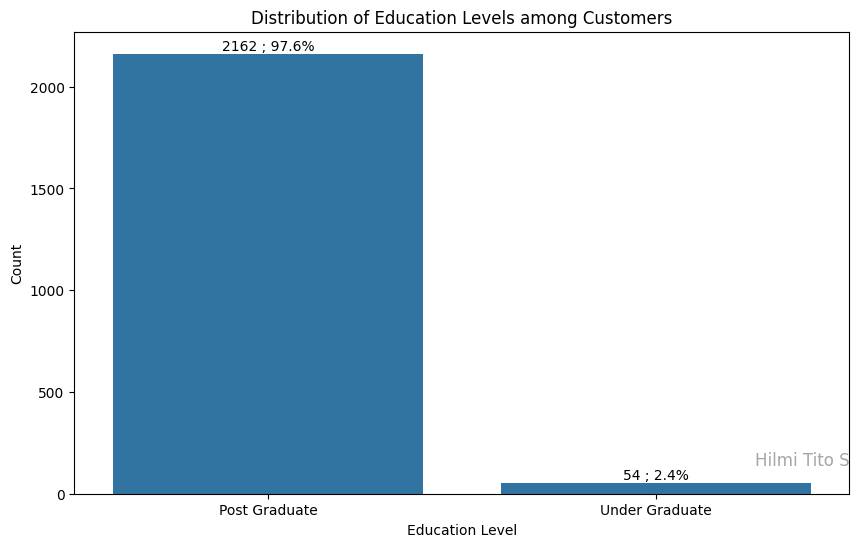

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
education_counts = df1['Education'].value_counts()
total_counts = education_counts.sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=education_counts.index, y=education_counts.values)

for i in range(len(education_counts)):
    count = education_counts.values[i]
    percentage = (count / total_counts) * 100
    ax.text(i, count + 0.05, f'{count} ; {percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels among Customers')
fig = plt.gcf()
fig.text(0.9, 0.15, 'Hilmi Tito S', fontsize=12,
         color='grey', ha='right', va='bottom', alpha=0.7)
plt.show()

Kesimpulan : proporsi customer yang level edukasinya "Post Graduate" adalah 97,6 %, sedangkan proporsi customer yang leve edukasinya "Under Graduate" adalah 2,4 %.

In [37]:
# Variabel Marital_Status
df1['Marital_Status'].value_counts()


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Kelompokkan Married dan Together menjadi Relationship; Single, Divorced, Widow, Alone, Absurd, YOLO menjadi Non-Relationship

In [38]:
df1['Marital_Status'] = df1['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df1['Marital_Status'] = df1['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Non-Relationship')
df1['Marital_Status'].value_counts()

Marital_Status
Relationship        1430
Non-Relationship     786
Name: count, dtype: int64

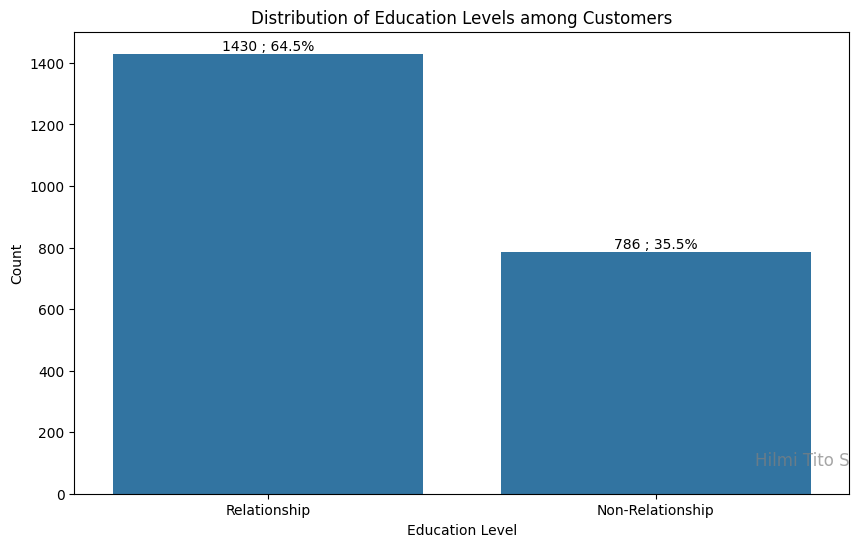

In [39]:
maritalstatus_counts = df1['Marital_Status'].value_counts()
total_counts = maritalstatus_counts.sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=maritalstatus_counts.index, y=maritalstatus_counts.values)

for i in range(len(maritalstatus_counts)):
    count = maritalstatus_counts.values[i]
    percentage = (count / total_counts) * 100
    ax.text(i, count + 0.05, f'{count} ; {percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels among Customers')
fig = plt.gcf()
fig.text(0.9, 0.15, 'Hilmi Tito S', fontsize=12,
         color='grey', ha='right', va='bottom', alpha=0.7)
plt.show()

Kesimpulan : proporsi customer yang statusnya Relationship adalah 64,5 %, sedangkan proporsi customer yang statusnya Non-Relationship adalah 35,5 %.

In [40]:
# Variabel Income
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\1488953789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Income']);


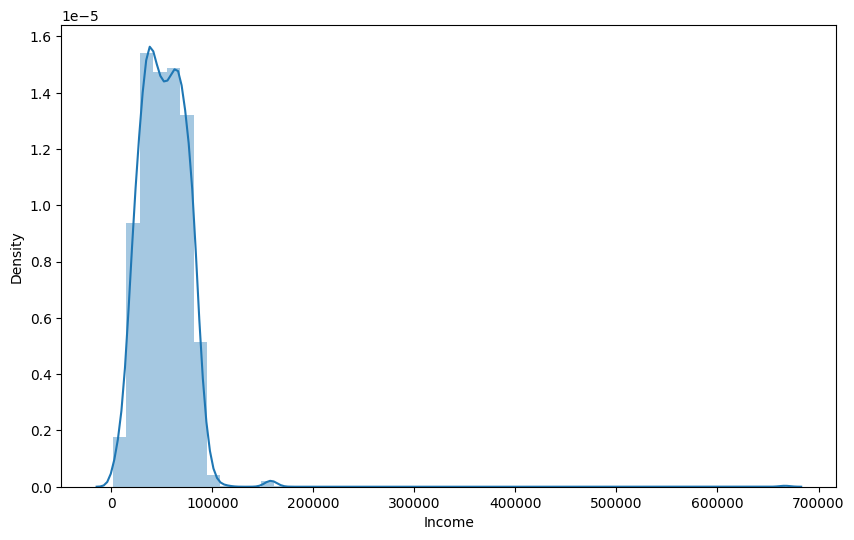

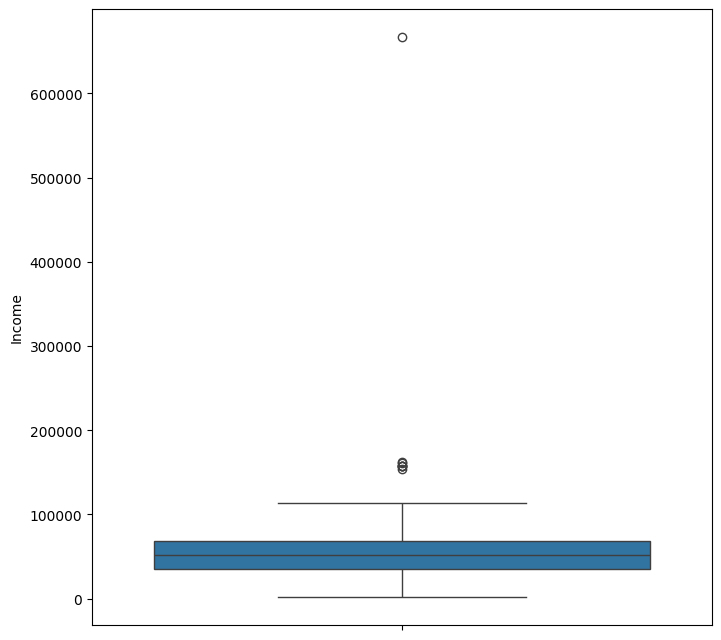

In [41]:
plt.figure(figsize=(10, 6))
sns.distplot(df1['Income']);
plt.figure(figsize=(8, 8))
sns.boxplot(df1['Income']);

In [42]:
# Variabel Kidhome
df1['Kidhome'].value_counts()

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

In [43]:
df1['Teenhome'].value_counts()

Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64

Gabungkan Kidhome dan Teenhome menjadi 1 variabel baru karena keduanya sama-sama dibiayai oleh orangtuanya; kid = Kidhome + Teenhome

In [44]:
df1['Kid'] = df1['Kidhome'] + df1['Teenhome']
df1['Kid'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kid, Length: 2216, dtype: int64>

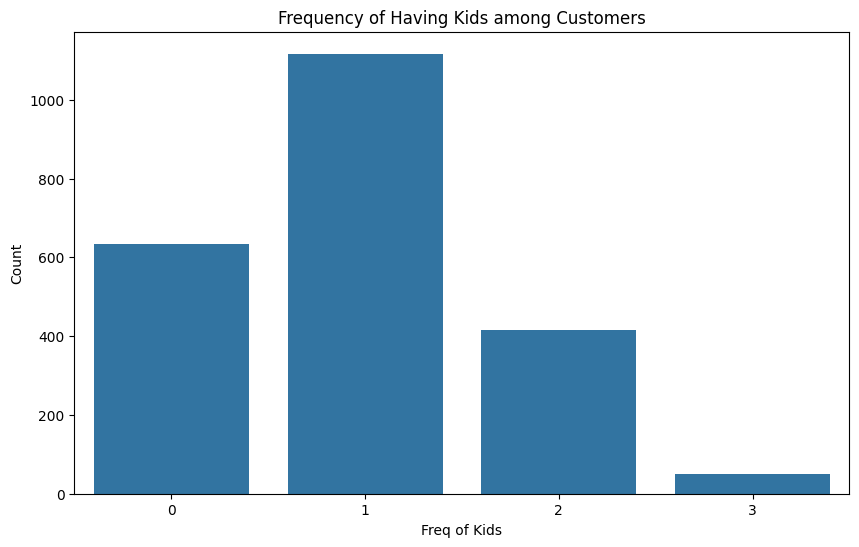

In [122]:
Kid_counts = df1['Kid'].value_counts()
total_counts = Kid_counts.sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Kid_counts.index, y=Kid_counts.values)
plt.xlabel('Freq of Kids')
plt.ylabel('Count')
plt.title('Frequency of Having Kids among Customers')
plt.show()

In [46]:
# Variabel MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
df1['MntWines'].unique()

array([ 635,   11,  426,  173,  520,  235,   76,   14,   28,    6,  194,
        233,    3, 1006,   53,   84, 1012,    4,   86,    1,  867,  384,
        270,   36,  684,    8,  112,  110,   96,  482,   40,  702,   55,
        437,  421,   13,    9,  123,  826,  245,  650,   12,  510,  328,
        984,  295,  447,  712,  452,  523,  546,  398,   10,  688,  247,
        856,  496,  258,  565,    2,  721, 1032,  577,   64,   25,  163,
         17,  130,  292,  350,  135,   15,   27,    5,  505,   51,  207,
         41,  386,  562,  217,  144,  454,  425, 1332,  527,  490,  378,
        547,   47,  320,   34,  722,  162,  450,   70,  492,  120,  534,
        236,  220,  796,    0,  962,  738,  399,  614,   32,  598,   73,
         42,  346,  888,  997,  212,  536, 1349, 1001,   20,   18,  125,
        277,    7,   85,   81,   59, 1149,  847,   29,  152,  620,   35,
        356,  783,  466,   23,  656,  519,  344,  448,  265,  587,  763,
         22,   54, 1170,   72,  613,  224,  410,  2

In [47]:
df1['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,  16,  61,   2,  14,
        22,   5,  80,  17,   3, 100,  12,  34,   8,  76, 164,  18,   6,
        50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36, 107,
       111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,  90,
        48,  27,  33, 133,  58,  28,  21,  20,  11, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154], dtype=int64)

In [48]:
df1['MntMeatProducts'].unique()

array([ 546,    6,  127,   20,  118,   98,  164,   56,   24,   11,  480,
         53,   17,  115,   19,   38,  498,   73, 1725,   86,  102,   27,
         25,   30,   42,  801,   10,   44,    5,   96,  471,  151,   14,
        206,  536,   29,  266,   15,  317,  125,  780,  550,  124,  432,
        482,    8,   28,  538,  134,   48,  367,    1,  309,  159,  487,
        460,  291,   65,   13,  925,  779,   64,   68,  424,   16,   37,
        568,   39,   26,    7,  447,   92,  183,  276,  690,   32,  271,
         31,  106,  292,  311,   21,  101,  812,   94,  133,  951,  110,
         47,  189,   33,  590,    3,   34,   12,  921,  232,  756,  132,
         41,  141,   18,   90,   78,   57,  269,   69,  387,  249,   49,
        240, 1582,  305,  449,  119,   22,  195,    2,  107,  537,   45,
        813,   79,  553,  337,  138,  113,  320,  319,   59,  554,  171,
          4,  417,  162,  540,  154,  207,  204,  740,    9,  137,  184,
        464,  757,  503,  272,  179,  768,  444,   

In [49]:
df1['MntFishProducts'].unique()

array([172,   2, 111,  10,  46,   0,  50,   3,   1,  11, 225,   6,  59,
       150,  30,  69,  21,  39,  15,  20,  34,  33, 119, 160,  82, 227,
        37,  27, 156,  12, 180, 121,  16, 201,   7,  58, 189,  84,   4,
        97, 137, 110,  75,  65, 185,  80,  31,  23,  29, 151, 123,  44,
        40, 173,  38,  52,  13,  36,  43,  73,  32,   8,  19, 149, 134,
        86, 140, 147, 224,  42,  76,  47, 254,  25,  67,  28, 186, 218,
       104, 133, 220,  45,  24, 205, 162,  95, 101, 188,  55, 166, 216,
        60, 219,  17,  77,  78,  72, 212, 129,  93,  99, 102, 179,  61,
        62, 197, 199, 120, 169, 240,  63,  91, 106, 146,  56, 127, 136,
       168,  49,  54, 132,  71,  64, 231,  85, 202,  41, 125,  26, 175,
       164, 177, 138, 247, 159, 153,  90,  51, 234,  68, 210,  89, 194,
       250, 237, 145, 167,  48, 192, 130, 232, 116, 184, 158,  94, 259,
       115, 207, 112,  98, 182, 141, 124, 171, 193, 242, 246,  35, 142,
       253, 258, 198, 223,   5, 103, 108, 181,  81, 128, 208, 11

In [50]:
df1['MntSweetProducts'].unique()

array([ 88,   1,  21,   3,  27,  42,  49, 112,   5,  68,  13,  12,  16,
        24,  38,   0,  32,   6,  66,   2,  22,   8,   7, 178,  30,  67,
       167,  40, 120,  18,  14, 122,  82,  29,  60,  37,  15, 105,  65,
         4, 133,  61, 132,  26,  98,  35,  51,  20, 103,   9,  72,  28,
        89,  41,  44,  33,  11,  91,  76,  17,  71, 113,  19, 173,  23,
        87, 176, 102,  48, 138,  10, 163, 124,  70, 172,  84, 149,  73,
        92, 130,  25,  74, 114, 141,  54, 147,  45,  46,  97,  64, 118,
       153, 189, 107, 128,  50, 134,  36, 150,  78, 137,  34,  95, 156,
        47, 194,  96, 191, 192,  75,  62,  58, 129,  31,  57, 108, 123,
       185, 121, 127, 125, 198,  43, 115,  80, 106, 101, 110,  83, 160,
       166, 136,  56, 116, 182, 148, 161,  69, 157,  55, 143, 169,  86,
       146,  59, 152,  77,  53,  39,  93, 151,  99, 144, 195,  63, 175,
       145, 162, 187, 126,  85, 109, 197, 165, 174, 196,  81, 139, 188,
       142,  94, 262, 179, 100,  79, 111], dtype=int64)

In [51]:
df1['MntGoldProds'].unique()

array([ 88,   6,  42,   5,  15,  14,  27,  23,   2,  13,  16,  30,  45,
         4,  28, 176,  39,  48,   1,  19,  99,  41,  10,   0,  89,   3,
        43,  22,  35,  36, 102,   7,  12, 174,  50,  38,  32, 241, 109,
       190,  40,  80, 169,  73,  86,   9,  18,  51,  17,  76,  34, 145,
        75, 223,  11, 111,  81,  65,  79,  60,  72,  33, 120, 168, 172,
       216,  58, 130,  20, 126, 116,  49,   8,  91,  57, 124,  26, 141,
       117,  25,  92,  54,  21, 192,  44,  66, 182, 181, 152,  77,  70,
       148,  24,  69, 146, 162, 131,  74, 135, 203,  52,  63, 139, 122,
       224, 173, 218,  93,  61, 142,  29, 233, 101, 157,  55, 107, 159,
        78, 110, 125, 114,  68, 191,  95,  37,  64,  46, 119,  90, 134,
       108, 153,  84,  59,  31, 175,  85,  71,  47, 118,  83, 106, 165,
       163, 144, 147, 207, 151, 154, 115,  67, 242, 155, 249, 183, 170,
        97, 227, 121, 205, 112, 198, 177, 133,  94,  56,  82, 187, 171,
        98, 129,  96,  53, 166, 195, 231, 158, 123, 200, 178, 14

Agar mempermudah proses analisis data, akan digabung variabel-variabel tersebut as variabel items; variabel terjualnya barang.

In [52]:
df1['items'] = df1['MntWines']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntFishProducts']+df1['MntSweetProducts']+df1['MntGoldProds']

In [53]:
df1[['items']].head()

,items
0,1617
1,27
2,776
3,53
4,422


C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\3928400082.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['items']);


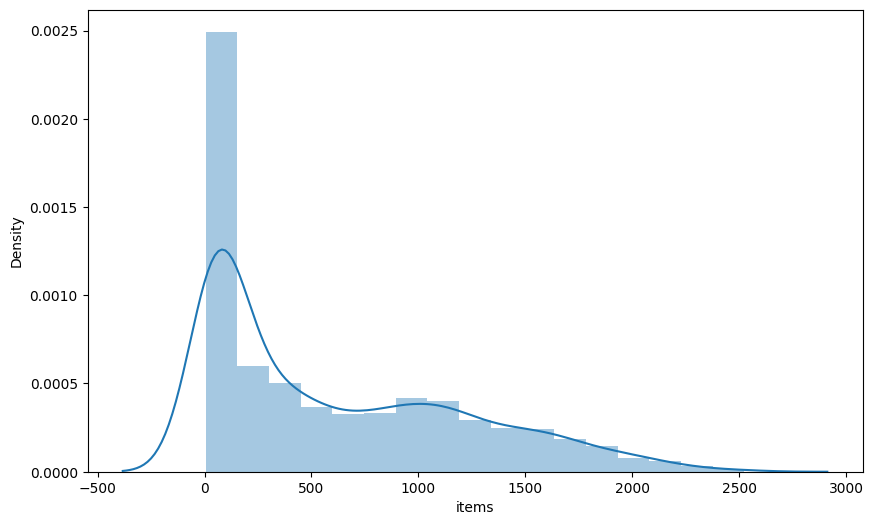

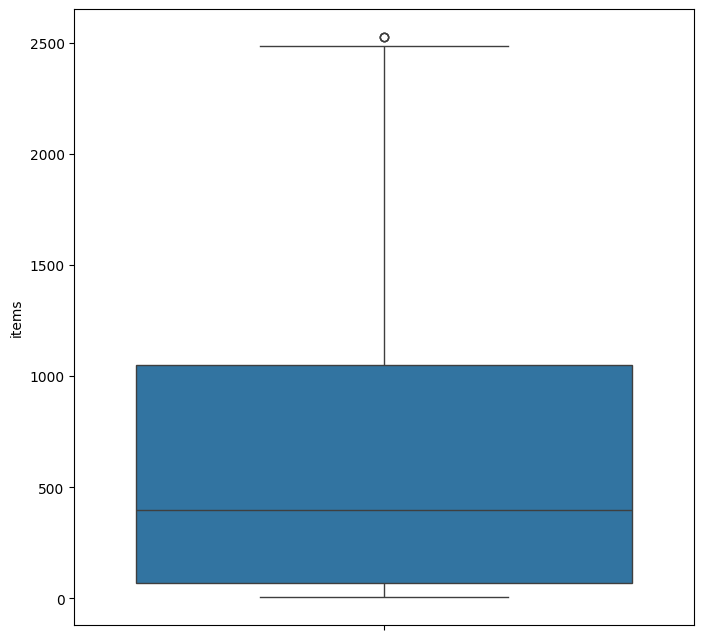

In [54]:
plt.figure(figsize=(10, 6))
sns.distplot(df1['items']);
plt.figure(figsize=(8, 8))
sns.boxplot(df1['items']);

In [55]:
# Variabel NumDealsPurchases
df1['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     960
2     493
3     293
4     188
5      94
6      60
0      44
7      39
8      14
9       8
15      7
10      5
11      5
13      3
12      3
Name: count, dtype: int64

In [56]:
# Variabel AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, dan Response
df1['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2074
1     142
Name: count, dtype: int64

In [57]:
df1['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2186
1      30
Name: count, dtype: int64

In [58]:
df1['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2053
1     163
Name: count, dtype: int64

In [59]:
df1['AcceptedCmp4'].value_counts()

AcceptedCmp4
0    2052
1     164
Name: count, dtype: int64

In [60]:
df1['AcceptedCmp5'].value_counts()

AcceptedCmp5
0    2054
1     162
Name: count, dtype: int64

In [61]:
df1['Response'].value_counts()

Response
0    1883
1     333
Name: count, dtype: int64

Akan dibentuk variabel baru TotalAcceptedCmp untuk jumlah berapa kali berhasilnya campaign.

In [62]:
df1['TotalAcceptedCmp'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5'] + df1['Response']

In [63]:
df1['TotalAcceptedCmp'].value_counts()

TotalAcceptedCmp
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

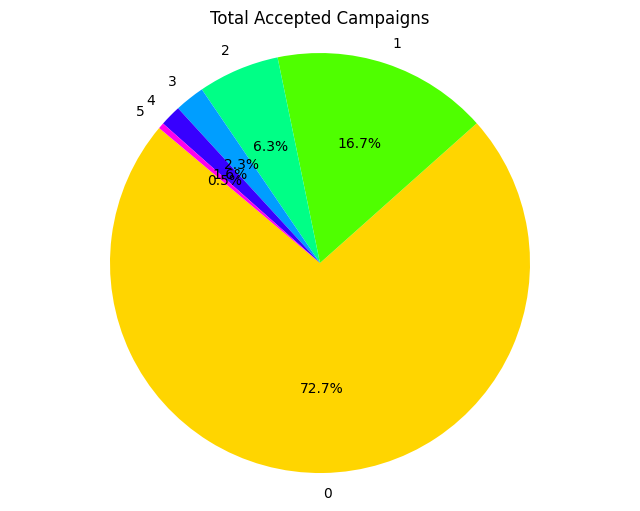

In [64]:
counts = df1['TotalAcceptedCmp'].value_counts(normalize=True)

# Plot the pie chart using matplotlib
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("hsv", len(counts)))
plt.title('Total Accepted Campaigns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

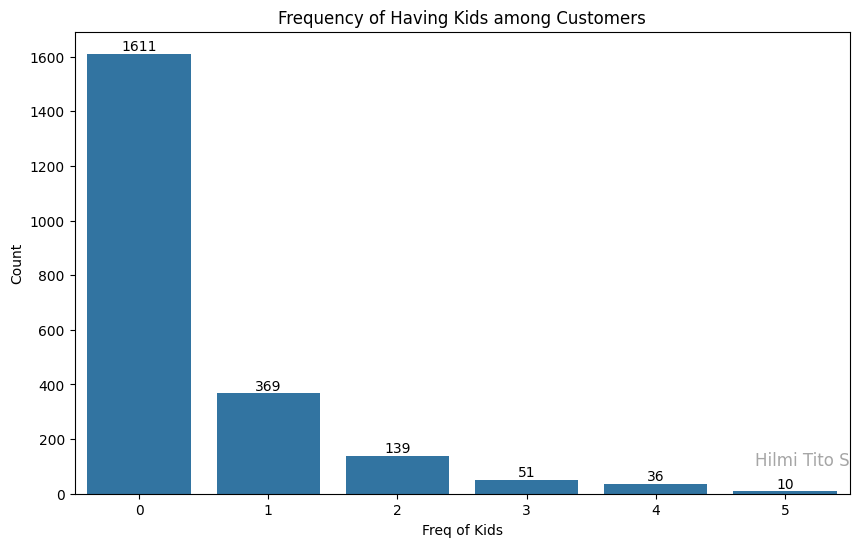

In [65]:
Kid_counts = df1['TotalAcceptedCmp'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Kid_counts.index, y=Kid_counts.values)

for i in range(len(Kid_counts)):
    count = Kid_counts.values[i]
    ax.text(i, count + 0.05, f'{count}', ha='center', va='bottom')

plt.xlabel('Freq of Kids')
plt.ylabel('Count')
plt.title('Frequency of Having Kids among Customers')
fig = plt.gcf()
fig.text(0.9, 0.15, 'Hilmi Tito S', fontsize=12,
         color='grey', ha='right', va='bottom', alpha=0.7)
plt.show()

Kesimpulan: Marketing campaign masih belum berhasil karena mostly sebanyak 72.7% masih belum menerima penawarannya, akan tetapi marketing campaign tersebut sudah mulai berhasil di last campaign (Response) dengan total jumlah 333 penerimaan.

In [66]:
# Variabel NumWebPurchases, NumCatalogPurchases, NumStorePurchases
print(df1['NumWebPurchases'].value_counts())
print(df1['NumCatalogPurchases'].value_counts())
print(df1['NumStorePurchases'].value_counts())


NumWebPurchases
2     368
1     348
3     334
4     277
5     219
6     201
7     154
8     102
9      75
0      48
11     44
10     43
23      1
27      1
25      1
Name: count, dtype: int64
NumCatalogPurchases
0     576
1     492
2     274
3     182
4     181
5     137
6     128
7      79
8      55
10     47
9      42
11     19
28      3
22      1
Name: count, dtype: int64
NumStorePurchases
3     484
4     319
2     220
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: count, dtype: int64


Karena penjualannya tidak terlalu begitu jauh, agar mempermudah analisisnya. Akan digabungkan variabel tersebut menjadi variabel baru.

In [67]:
df1['NumTotalPurchases'] = df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']
df1['NumTotalPurchases']

0       22
1        4
2       20
3        6
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239     8
Name: NumTotalPurchases, Length: 2216, dtype: int64

In [68]:
# Variabel NumWebVisitsMonth
df1['NumWebVisitsMonth'].value_counts()

NumWebVisitsMonth
7     387
8     340
6     335
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1
Name: count, dtype: int64

In [70]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kid,items,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Non-Relationship,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,1617,1,22
1,2174,1954,Post Graduate,Non-Relationship,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,27,0,4
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,776,0,20
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,53,0,6
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,422,0,14


2. Akan dianalisi berdasarkan Bivariate yang berhubungan dengan business problem

Sudah dilakukan tahap _data cleaning_ dan analisis univariate. Sekarang, kita bisa mulai melakukan analisis untuk **Mengidentifikasi kelompok pelanggan berdasarkan total pengeluaran mereka untuk berbagai kategori produk**.  

Analisis akan dilakukan dengan membandingkan pengeluaran yang diwakili dengan data items (df1['MntWines']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntFishProducts']+df1['MntSweetProducts']+df1['MntGoldProds']) berdasarkan fitur yang tersedia.

### Business Question

- Bagaimana dampak Pendidikan terhadap Pengeluaran?

In [71]:
pd.crosstab(df1['Education'],df1['items'],margins=True).style.background_gradient(cmap='Blues')

Hampir semua aspek pembelian item didominasi oleh Orang dengan pendidikan Post Graduate. Hanya pembelian barang sebanyak 29 dan 80 yang didominasi oleh orang dengan pendidikan Under-Graduate.

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\3483648910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Education", y="items", data=df1, color='blue', palette="rainbow")


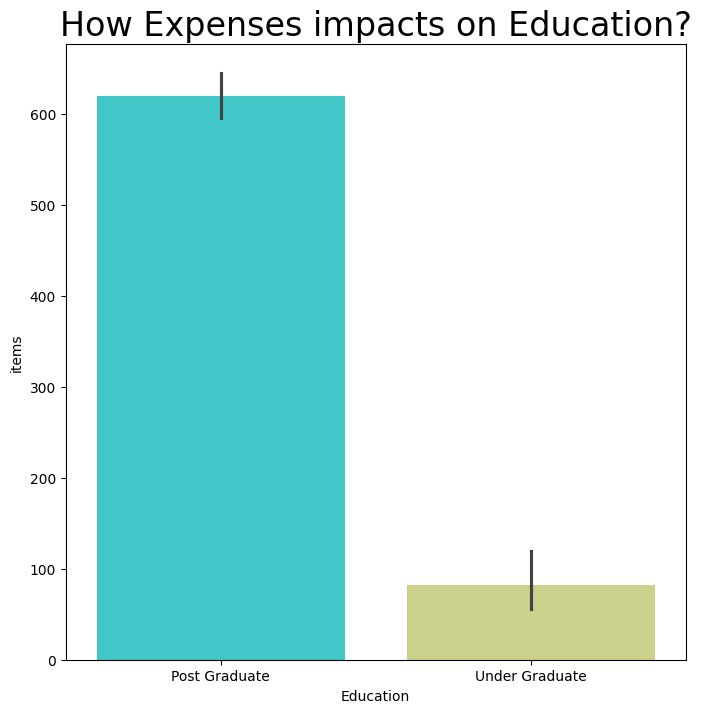

In [72]:
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="items", data=df1, color='blue', palette="rainbow")
plt.show()

Rata-rata orang berpendidikan Post Graduate untuk membeli suatu item lebih tinggi dibanding Rata-rata orang berpendidikan Under Graduate

Berdasarkan hasil Crosstab dan barplot tersebut,
- Semakin tinggi pendidikan, semakin juga pengeluaran yang dikeluarkan. Menurut Bourdieu (1984), pendidikan berperan dalam membentuk "modal budaya" yang mempengaruhi kebiasaan konsumsi seseorang. Mereka dengan pendidikan yang lebih tinggi cenderung terlibat dalam lebih banyak kegiatan sosial, memiliki akses ke berbagai bentuk hiburan, dan seringkali lebih sadar akan tren dan teknologi baru, yang semuanya memerlukan pengeluaran tambahan

- Bagaimana dampak Status terhadap Pengeluaran?

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\4152906687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Marital_Status", y="items", data=df1, color='blue', palette="rainbow")


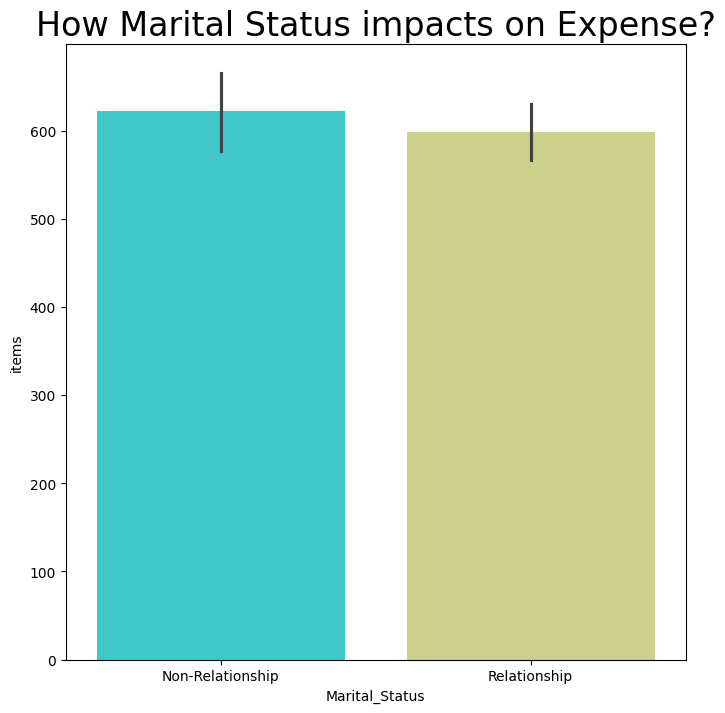

In [73]:
plt.figure(figsize=(8,8))
plt.title("How Marital Status impacts on Expense?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="items", data=df1, color='blue', palette="rainbow")
plt.show()

Ho: Rata-rata jumlah item yang dibeli tidak berbeda secara signifikan di antara berbagai status Relationship.
Ha: Rata-rata jumlah item yang dibeli berbeda secara signifikan di antara berbagai status Relationship.

In [74]:
import pandas as pd
from scipy.stats import f_oneway

Relationship = df1[df1['Marital_Status'] == 'Relationship']['items']
NonRelationship = df1[df1['Marital_Status'] == 'Non-Relationship']['items']

f_stat, pval = f_oneway(Relationship, NonRelationship)

if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')


Terima Ho


Berdasarkan barplot tersebut, Status Pernikahan tidak bergitu berdampak dengan pengeluaran karena bedanya tidak signifikan. Hal ini juga diperkuat oleh teori dari Milton Friedman bahwa pendapatan permanen yang menyatakan bahwa pengeluaran konsumen lebih dipengaruhi oleh pendapatan jangka panjang mereka daripada oleh pendapatan atau status sosial jangka pendek. Ini menunjukkan bahwa keputusan pengeluaran didasarkan pada pendapatan yang diharapkan secara keseluruhan, bukan pada status pernikahan saat ini. Hal tersebut juga didukung dengan uji statistik bahwa Status Pernikahan tidak bergitu berdampak dengan pengeluaran

- Bagaimana dampak mempunyai anak terhadap Pengeluaran?

In [123]:
pd.crosstab(df1['Kid'],df1['items'],margins=True).style.background_gradient(cmap='Blues')

items,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106,107,108,109,112,114,115,116,117,119,120,121,122,123,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,155,156,157,158,159,160,161,162,163,165,167,169,170,171,172,173,174,175,176,177,178,180,182,183,184,185,186,187,188,189,191,192,193,194,195,198,199,201,203,205,209,210,211,213,215,216,217,218,219,221,222,223,224,225,227,231,232,233,235,236,237,240,241,242,244,246,251,252,253,254,255,257,258,259,260,263,264,265,266,267,268,269,270,271,272,273,274,275,277,278,279,282,283,284,285,289,290,292,293,294,296,297,299,300,301,302,304,305,306,309,310,311,312,313,315,316,317,318,319,320,322,324,325,326,330,331,332,334,335,339,341,343,347,348,350,351,353,354,357,358,359,361,362,363,365,367,368,369,371,372,373,377,380,382,384,385,388,390,392,393,395,396,397,398,400,401,404,405,406,407,409,410,411,413,414,415,416,417,418,421,422,424,425,426,428,429,431,433,434,436,437,438,441,442,443,444,446,447,448,449,450,454,455,458,459,460,461,463,467,468,470,473,475,480,482,484,485,486,488,490,491,492,493,494,495,496,497,499,500,502,504,506,507,515,518,519,521,523,525,526,527,528,529,530,534,535,541,542,544,545,546,551,556,557,559,561,562,563,564,568,570,573,574,575,576,577,578,581,586,587,590,594,595,596,597,599,601,602,605,606,608,610,611,612,614,615,622,629,630,632,633,634,635,636,637,638,639,641,642,653,654,655,656,660,661,662,663,664,670,677,679,680,682,683,684,685,688,689,690,691,692,693,694,702,704,708,710,711,714,715,716,724,725,726,727,728,729,730,731,732,733,734,735,736,745,746,747,749,751,756,757,758,761,763,764,766,767,769,770,772,775,776,777,778,779,787,789,792,793,794,795,797,798,800,801,802,805,809,811,813,815,816,817,818,819,820,823,825,832,833,834,835,836,839,841,843,844,845,849,850,854,858,859,860,861,863,868,869,871,873,874,877,879,882,884,889,890,892,893,894,895,899,900,901,902,903,904,906,907,908,909,910,913,914,915,916,917,925,926,928,929,930,932,936,937,938,939,940,943,945,946,948,953,957,960,961,963,964,965,966,967,968,969,971,972,973,974,976,978,981,982,984,988,989,990,992,993,995,999,1001,1003,1004,1005,1006,1008,1009,1012,1013,1016,1019,1020,1021,1024,1026,1027,1028,1029,1033,1034,1038,1039,1040,1042,1043,1044,1045,1047,1048,1049,1052,1053,1060,1062,1064,1065,1066,1067,1068,1071,1072,1073,1076,1078,1079,1080,1082,1084,1085,1086,1088,1089,1091,1092,1093,1095,1097,1099,1101,1102,1103,1104,1105,1106,1109,1112,1113,1115,1117,1120,1121,1123,1125,1127,1128,1130,1131,1134,1135,1138,1139,1141,1143,1146,1147,1148,1149,1150,1151,1152,1155,1156,1157,1158,1159,1161,1165,1167,1168,1169,1171,1173,1174,1175,1178,1179,1180,1182,1185,1187,1188,1189,1190,1191,1192,1193,1194,1196,1198,1199,1208,1210,1211,1213,1215,1216,1217,1220,1226,1228,1229,1230,1231,1232,1234,1237,1240,1241,1242,1244,1245,1250,1253,1258,1260,1263,1264,1269,1270,1272,1274,1277,1280,1281,1282,1283,1286,1288,1289,1291,1293,1295,1298,1305,1307,1313,1314,1315,1318,1319,1323,1327,1331,1334,1335,1336,1338,1341,1345,1346,1348,1363,1364,1365,1366,1367,1370,1371,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1385,1388,1390,1392,1395,1396,1400,1401,1410,1415,1416,1423,1424,1427,1428,1429,1435,1438,1440,1442,1443,1445,1449,1453,1455,1456,1459,1461,1464,1471,1472,1474,1477,1478,1479,1482,1483,1485,1490,1493,1495,1497,1501,1502,1504,1507,1508,1511,1512,1513,1515,1518,1525,1526,1528,1529,1531,1533,1536,1538,1540,1544,1555,1562,1564,1565,1566,1572,1573,1574,1575,1576,1580,1581,1586,1587,1588,1596,1597,1598,1600,1603,1608,1612,1615,1616,1617,1621,1623,1627,1631,1633,1635,1638,1643,1644,1650,1651,1655,1658,1662,1665,1670,1672,1674,1676,1677,1678,1680,1682,1685,1686,1688,1690,1691,1693,1695,1701,1702,1706,1711,1717,1722,1724,1727,1730,1734

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\3915235404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Kid", y="items", data=df1,palette="rainbow");


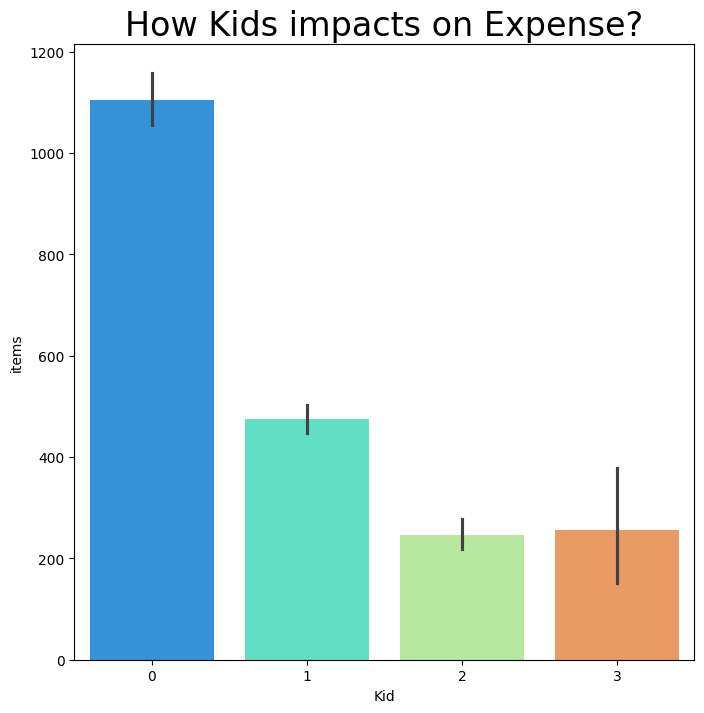

In [75]:
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expense?",fontsize=24)
ax = sns.barplot(x="Kid", y="items", data=df1,palette="rainbow");

Dapat disimpulkan bahwa mempunyai anak tidak membuat rata-rata pengeluaran lebih banyak. Malah sebaliknya, terlihat bahwa tidak memiliki anak memiliki pembelian barang terbanyak.

- Bagaimana dampak TotalAcceptedCmp terhadap Pengeluaran?
- Bagaimana kenaikan rata-rata pengeluaran terhadap marketing campaign?

In [76]:
pd.crosstab(df1['TotalAcceptedCmp'],df1['items'],margins=True).style.background_gradient(cmap='Blues')

items,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106,107,108,109,112,114,115,116,117,119,120,121,122,123,125,126,127,128,129,130,131,132,133,134,135,137,138,139,140,141,143,144,145,146,147,148,149,151,152,153,155,156,157,158,159,160,161,162,163,165,167,169,170,171,172,173,174,175,176,177,178,180,182,183,184,185,186,187,188,189,191,192,193,194,195,198,199,201,203,205,209,210,211,213,215,216,217,218,219,221,222,223,224,225,227,231,232,233,235,236,237,240,241,242,244,246,251,252,253,254,255,257,258,259,260,263,264,265,266,267,268,269,270,271,272,273,274,275,277,278,279,282,283,284,285,289,290,292,293,294,296,297,299,300,301,302,304,305,306,309,310,311,312,313,315,316,317,318,319,320,322,324,325,326,330,331,332,334,335,339,341,343,347,348,350,351,353,354,357,358,359,361,362,363,365,367,368,369,371,372,373,377,380,382,384,385,388,390,392,393,395,396,397,398,400,401,404,405,406,407,409,410,411,413,414,415,416,417,418,421,422,424,425,426,428,429,431,433,434,436,437,438,441,442,443,444,446,447,448,449,450,454,455,458,459,460,461,463,467,468,470,473,475,480,482,484,485,486,488,490,491,492,493,494,495,496,497,499,500,502,504,506,507,515,518,519,521,523,525,526,527,528,529,530,534,535,541,542,544,545,546,551,556,557,559,561,562,563,564,568,570,573,574,575,576,577,578,581,586,587,590,594,595,596,597,599,601,602,605,606,608,610,611,612,614,615,622,629,630,632,633,634,635,636,637,638,639,641,642,653,654,655,656,660,661,662,663,664,670,677,679,680,682,683,684,685,688,689


C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\1146234637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="TotalAcceptedCmp", y="items", data=df1,palette="rainbow")


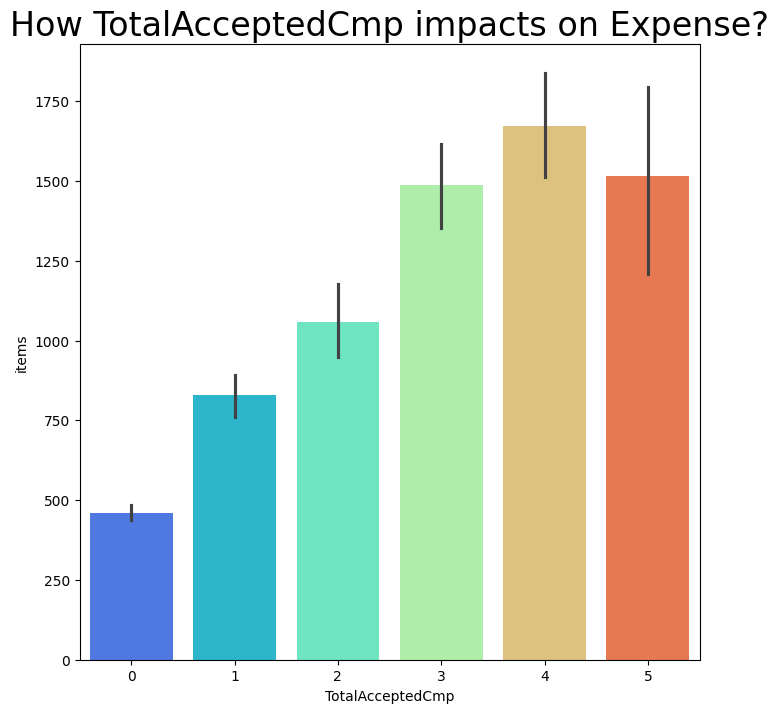

In [77]:
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expense?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="items", data=df1,palette="rainbow")

Berdasarkan Crosstab dan Barplot, diperoleh 2 poin:
1. orang yg tidak menerima campaign mendominasi pembelian barang dengan jumlah relatif sedikit; sedangkan persebaran mulai merata di pembelian barang yg sudah relatif banyak
2. Setiap customer menerima campaign, rata-rata pembelian barang di supermarket mengalami kenaikan hingga penerimaan mulai menurun di kelima kalinya

- Bagaimana dampak NumTotalPurchases terhadap Pengeluaran?

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\338002147.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x="NumTotalPurchases", y="items", data=df1,palette="rainbow")


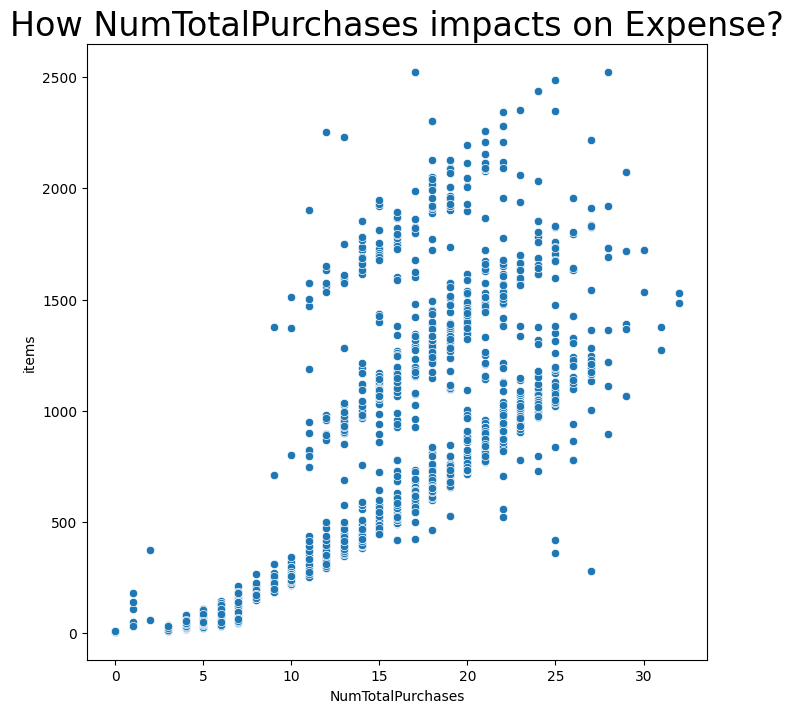

In [78]:
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expense?",fontsize=24)
ax = sns.scatterplot(x="NumTotalPurchases", y="items", data=df1,palette="rainbow")

Hipotesis Nol (Ho): Tidak ada hubungan linier antara kedua variabel.
Hipotesis Alternatif (Ha): Ada hubungan linier antara kedua variabel.

In [79]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_pval = spearmanr(df1['NumTotalPurchases'], df1['items'])

# Menentukan signifikansi hasil
if spearman_pval <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

Tolak Ho


Kesimpulannya adalah setiap kenaikan NumTotalPurchases akan disertai kenaikan pengeluaran/pembelian item. Hal tersebut juga telah diverifikasi oleh uji spearman.

- Bagaimana dampak Income terhadap Pengeluaran?
- Apakah semakin besar Incomenya semakin banyak yang dibeli oleh customer?

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\4232859813.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x="Income", y="items", data=df1,palette="rainbow")


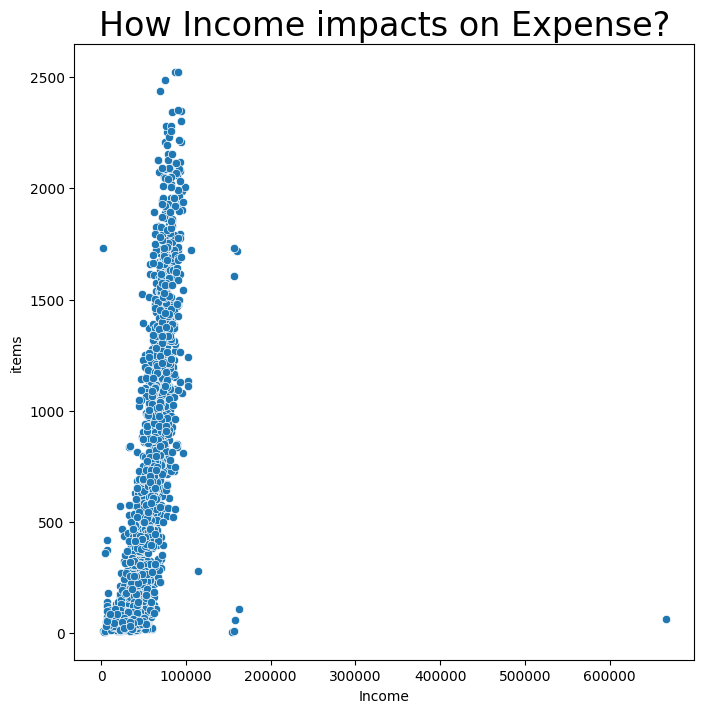

In [80]:
plt.figure(figsize=(8,8))
plt.title("How Income impacts on Expense?",fontsize=24)
ax = sns.scatterplot(x="Income", y="items", data=df1,palette="rainbow")

In [81]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

spearman_corr, spearman_pval = spearmanr(df1['Income'], df1['items'])

# Menentukan signifikansi hasil
if spearman_pval <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

Tolak Ho


Kesimpulannya adalah setiap kenaikan Income berdampak dengan kenaikan pengeluaran/pembelian item. Dari uji statistik juga, Kenaikan income linier dengan kenaikan pengeluaran.  

- Bagaiman dampak Diskon terhadap Pengeluaran?

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\399301366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumDealsPurchases", y="items", data=df1,palette="rainbow")


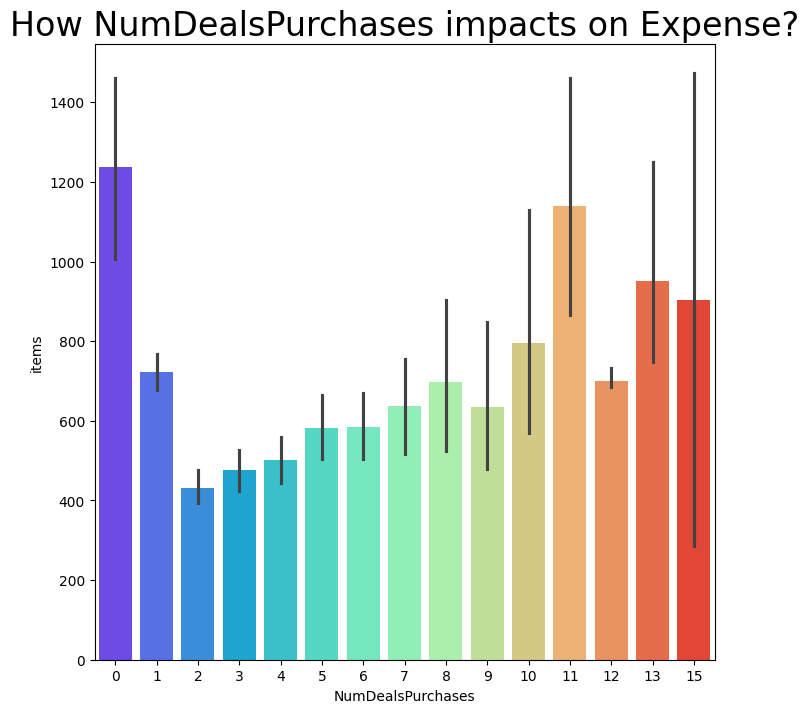

In [82]:
plt.figure(figsize=(8,8))
plt.title("How NumDealsPurchases impacts on Expense?",fontsize=24)
ax = sns.barplot(x="NumDealsPurchases", y="items", data=df1,palette="rainbow")

Kesimpulannya adalah Setiap bertambahnya barang yang dibeli diskon, pengeluaran/pembelian item rata-rata bertambah.

- Bagaiman dampak NumWebVisitsMonth terhadap Pengeluaran?

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\1022663911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumWebVisitsMonth", y="items", data=df1,palette="rainbow")


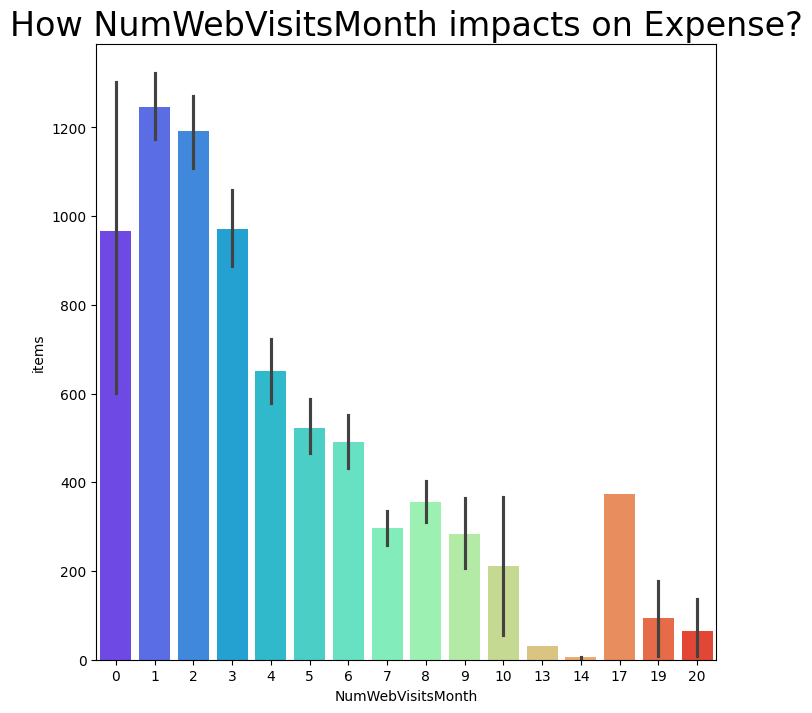

In [83]:
plt.figure(figsize=(8,8))
plt.title("How NumWebVisitsMonth impacts on Expense?",fontsize=24)
ax = sns.barplot(x="NumWebVisitsMonth", y="items", data=df1,palette="rainbow")

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\2825675920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumWebPurchases", y="items", data=df1,palette="rainbow")


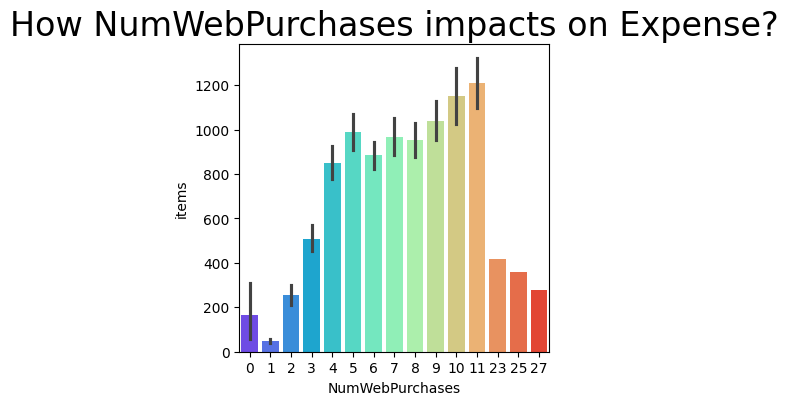

In [84]:
# Bantuan dengan data lain
plt.figure(figsize=(4,4))
plt.title("How NumWebPurchases impacts on Expense?",fontsize=24)
ax = sns.barplot(x="NumWebPurchases", y="items", data=df1,palette="rainbow")

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\2860034577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumCatalogPurchases", y="items", data=df1,palette="rainbow")


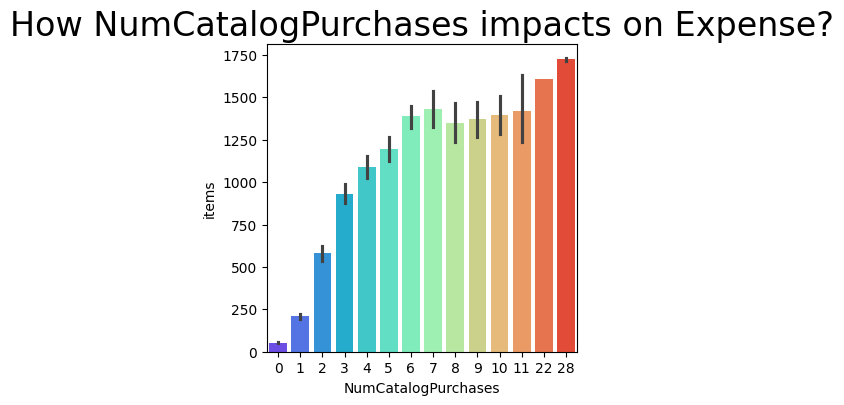

In [85]:
plt.figure(figsize=(4,4))
plt.title("How NumCatalogPurchases impacts on Expense?",fontsize=24)
ax = sns.barplot(x="NumCatalogPurchases", y="items", data=df1,palette="rainbow")

C:\Users\Hilmi Tito\AppData\Local\Temp\ipykernel_8864\2381984155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="NumStorePurchases", y="items", data=df1,palette="rainbow")


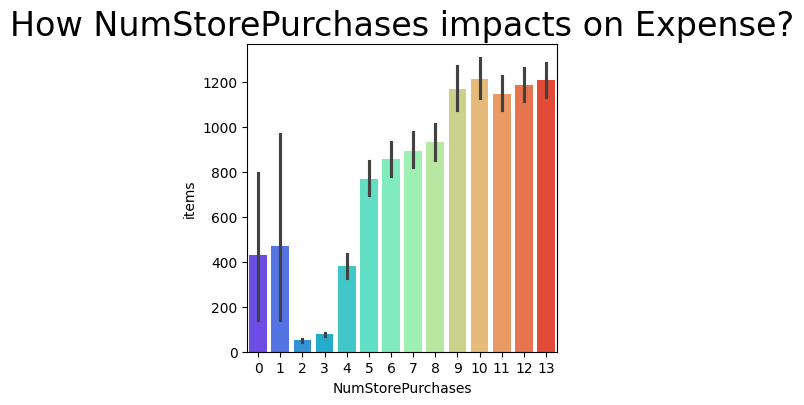

In [86]:
plt.figure(figsize=(4,4))
plt.title("How NumStorePurchases impacts on Expense?",fontsize=24)
ax = sns.barplot(x="NumStorePurchases", y="items", data=df1,palette="rainbow")

Kesimpulan: Customer yang mengujungi web tidak berdampak dengan pembelian suatu item. Dari data tambahan, kebanyakan customer membeli item yang banyak melalui store dan katalog offline dibanding via online.

In [87]:
import openpyxl
df1.to_excel('SupermarketCustomer.xlsx', index=False)

## +Bonus

In [88]:
df2 = df1.copy()

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [90]:
df2 = df2.drop(columns=["ID", "Year_Birth", "Education", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Z_CostContact", "Z_Revenue", "Response"],axis=1)

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2216 non-null   float64
 1   NumDealsPurchases  2216 non-null   int64  
 2   NumWebVisitsMonth  2216 non-null   int64  
 3   Kid                2216 non-null   int64  
 4   items              2216 non-null   int64  
 5   TotalAcceptedCmp   2216 non-null   int64  
 6   NumTotalPurchases  2216 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 138.5 KB


<Axes: >

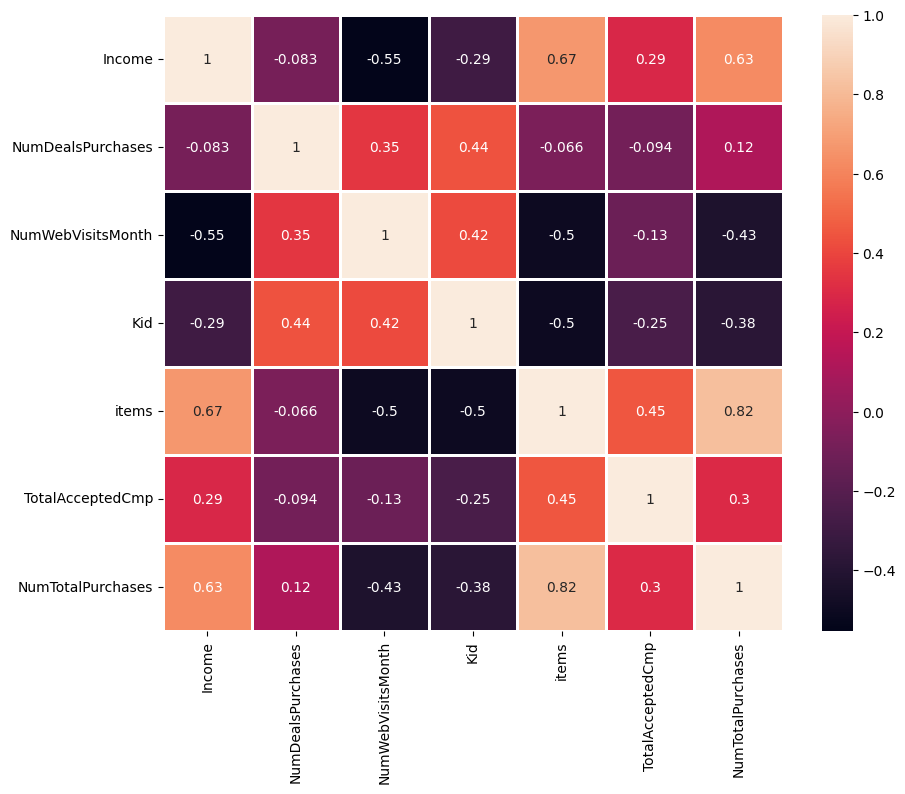

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, linewidths=1)

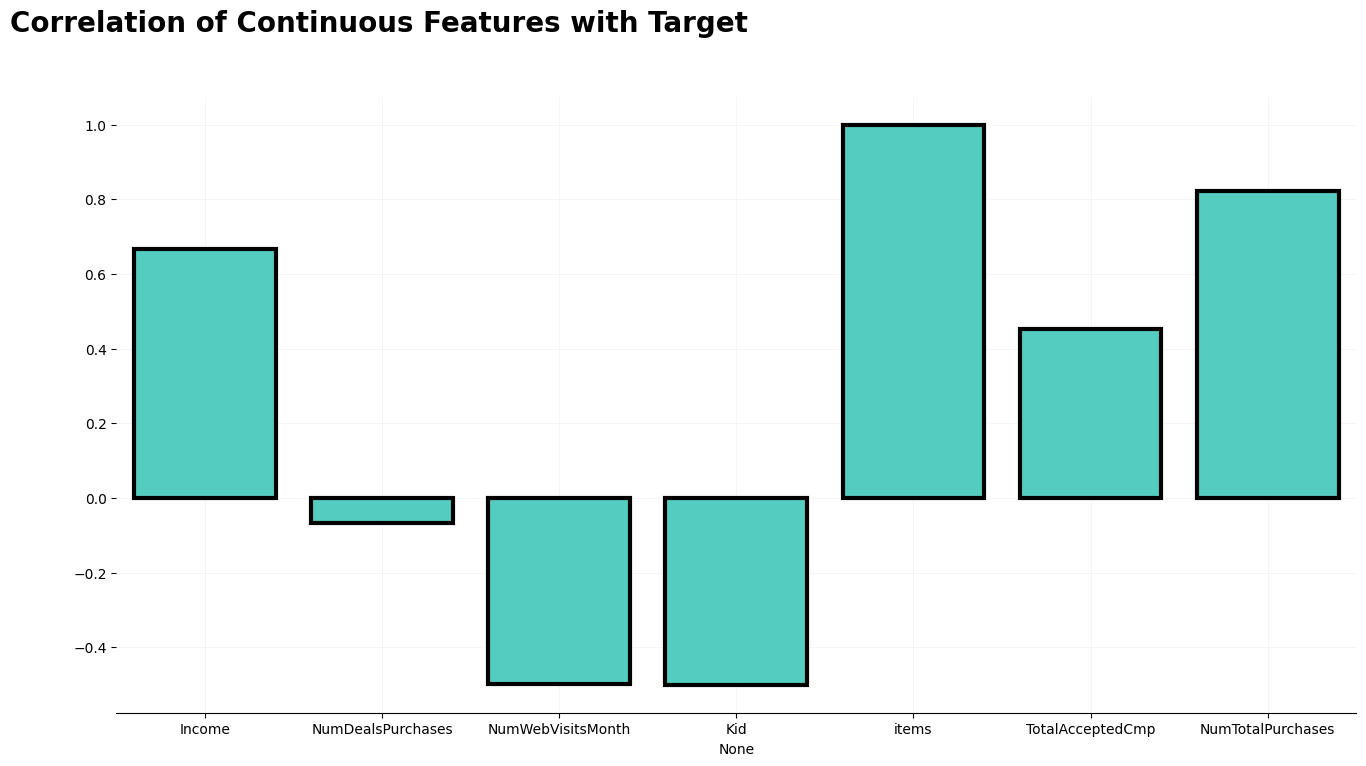

In [93]:
import matplotlib

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df2.corrwith(df2['items']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

- Nilai korelasi tertinggi adalah fitur NumTotalPurchases sebesar 0.82
- Nilai korelasi terendah adalah fitur NumDealsPurchases sebesar 0.066
- Note: Akan tetapi, saya memilih variabel Income sebagai input model agar hasilnya relevan

In [94]:
df2 = pd.concat([df2, df1[['Education', 'Marital_Status', 'Kid']]], axis=1)
df2

,Income,NumDealsPurchases,NumWebVisitsMonth,Kid,items,TotalAcceptedCmp,NumTotalPurchases,Education,Marital_Status,Kid
0,58138.0,3,7,0,1617,1,22,Post Graduate,Non-Relationship,0
1,46344.0,2,5,2,27,0,4,Post Graduate,Non-Relationship,2
2,71613.0,1,4,0,776,0,20,Post Graduate,Relationship,0
3,26646.0,2,6,1,53,0,6,Post Graduate,Relationship,1
4,58293.0,5,5,1,422,0,14,Post Graduate,Relationship,1
...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,2,5,1,1341,0,16,Post Graduate,Relationship,1
2236,64014.0,7,7,3,444,1,15,Post Graduate,Relationship,3
2237,56981.0,1,6,0,1241,1,18,Post Graduate,Non-Relationship,0
2238,69245.0,2,3,1,843,0,21,Post Graduate,Relationship,1


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2216 non-null   float64
 1   NumDealsPurchases  2216 non-null   int64  
 2   NumWebVisitsMonth  2216 non-null   int64  
 3   Kid                2216 non-null   int64  
 4   items              2216 non-null   int64  
 5   TotalAcceptedCmp   2216 non-null   int64  
 6   NumTotalPurchases  2216 non-null   int64  
 7   Education          2216 non-null   object 
 8   Marital_Status     2216 non-null   object 
 9   Kid                2216 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 190.4+ KB


In [103]:
df2.dtypes

Income               float64
NumDealsPurchases      int64
NumWebVisitsMonth      int64
Kid                    int64
items                  int64
TotalAcceptedCmp       int64
NumTotalPurchases      int64
Education             object
Marital_Status        object
Kid                    int64
dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
df2['Education']=df2[['Education']].apply(lbl_encode.fit_transform)
df2['Marital_Status']=df2[['Marital_Status']].apply(lbl_encode.fit_transform)

In [105]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df2.values)
sf_df = pd.DataFrame(scaled_features, index=df2.index, columns=df2.columns)

In [106]:
sf_df.head()

,Income,NumDealsPurchases,NumWebVisitsMonth,Kid,items,TotalAcceptedCmp,NumTotalPurchases,Education,Marital_Status,Kid
0,0.234063,0.351713,0.693232,-1.264803,1.675488,0.618045,1.310941,-0.158041,-1.348829,-1.264803
1,-0.234559,-0.168231,-0.131574,1.405806,-0.962358,-0.502731,-1.188023,-0.158041,-1.348829,1.405806
2,0.769478,-0.688176,-0.543978,-1.264803,0.280250,-0.502731,1.033278,-0.158041,0.741384,-1.264803
3,-1.017239,-0.168231,0.280829,0.070501,-0.919224,-0.502731,-0.910360,-0.158041,0.741384,0.070501
4,0.240221,1.391603,-0.131574,0.070501,-0.307044,-0.502731,0.200291,-0.158041,0.741384,0.070501


In [107]:
# Menggunakan variabel Income dan items
X = sf_df.iloc[:, [0, 4]].values
print(X)

[[ 0.2340627   1.67548812]
 [-0.23455948 -0.96235832]
 [ 0.76947764  0.28024985]
 ...
 [ 0.18809052  1.05169551]
 [ 0.67538765  0.39140438]
 [ 0.02470453 -0.7218    ]]


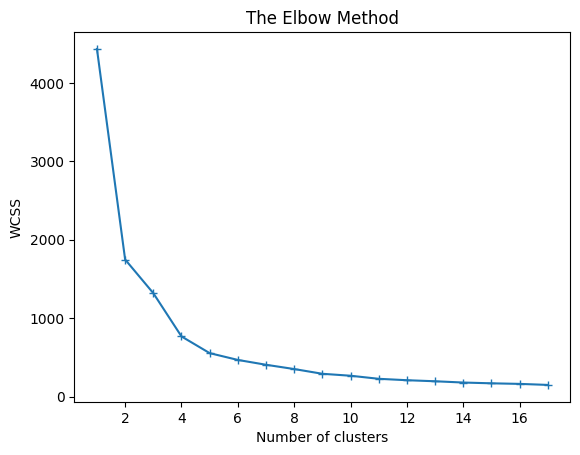

In [112]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,marker = '+')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

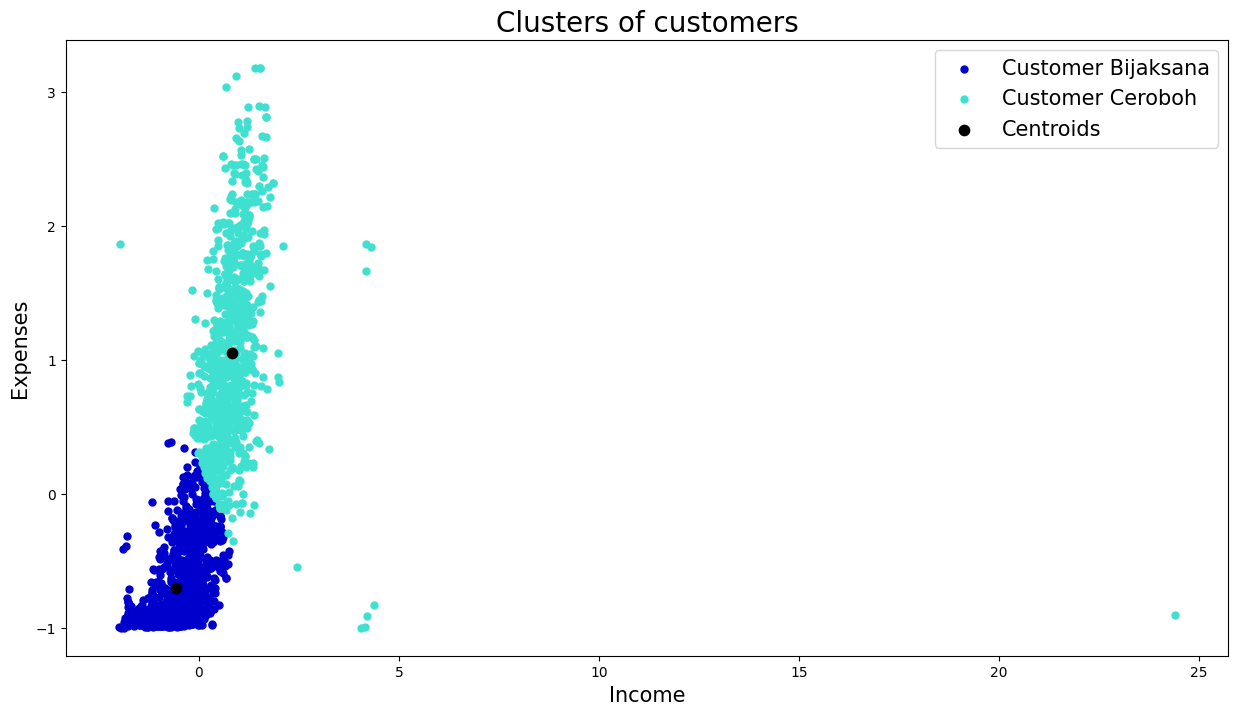

In [115]:
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Customer Bijaksana')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Customer Ceroboh')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Report:
- Customer terbanyak lahir pada tahun 76
- 97.6% dari Customer adalah Post Graduate(Graduation, PhD, Master, 2n Cycle)
- 64.5% dari Customer berstatus Relationship; 35.5% dari Customer berstatus Non-Relationship
- Rata-rata Income adalah 52247.251354; Income terbesar adalah 666666; Income minimal adalah 1730
- Customer memiliki anak 1 sebesar 50.4%; diikuti yang belum memiliki anak sebesar 28.6%, dan memilki anak 2 dan 3 masing-masing 18.8% dan 2.3%
- Expenses (items) memiliki distribusi skewed positif; dimana pembelian tinggi diantara 0 item hingga 500 item
- Proporsi campaign berhasil masih terbilang rendah karena campaign yang tidak diterima sebesar 72.7%

- Rata-rata Customer Post Graduate membeli suatu item lebih tinggi dibanding Rata-rata orang berpendidikan Under Graduate. Hal itu juga disebabkan karena jumlah customer Post Graduate lebih tinggi dari Under Graduate
- Status Pernikahan tidak bergitu berdampak dengan pengeluaran
- Customer yang memiliki 1 anak mendominasi membeli items dengan proporsi 50.35%. akan tetapi untuk rata-rata pembelian dipegang oleh yang tidak memiliki anak dengan rata-rata diatas 1100
- Setiap customer menerima campaign, rata-rata pembelian barang di supermarket mengalami kenaikan
- Setiap kenaikan Income berdampak dengan kenaikan pengeluaran/pembelian item
- Setiap bertambahnya barang yang dibeli diskon, pengeluaran/pembelian item rata-rata bertambah
- Customer yang mengujungi web tidak berdampak dengan pembelian suatu item. Dari data tambahan, kebanyakan customer membeli item yang banyak melalui store dan katalog offline dibanding via online.

- Berdasarkan model, Customer didominasi oleh Customer yang kurang bijak dalam melakukan pembelian item

# Rekomendasi:
- Campaign sudah berhasil meningkatkan pembelian, akan tetapi jangan dilakukan terlalu sering karena semakin banyak akan turun trennya. 
- Pada saat campaign, perlu adanya diskon yang menggiurkan karena diskon membuat para customer yang kurang bijak jadi membeli item yang tidak dibutuhkan sehingga meningkatkan penjualan apalagi customer tersebut memiliki income yang besar.
- Pada saat 2012-2014, Campaign online tidak terlalu efektif karena pembelian via website tidak begitu masif. Campaign offline masih memegang peranan penting karena kebanyakan masih melakukan transaksi via store atau katalog.
- Perlu melakukan survey terkait website karena tidak dapat ditarik kesimpulan bilamana website tersebut user-friendly atau tidak. Pengisian survey bisa sekaligus dengan pemberian diskon agar mendapat keuntungan insight serta pembelian item